<a href="https://colab.research.google.com/github/kunal-git-002/yolo-3/blob/master/yolo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
net=cv2.dnn.readNet("/content/gdrive/My Drive/yolov3/yolov3.weights","/content/gdrive/My Drive/yolov3/yolov3.cfg")


In [ ]:
classes=[]
with open("/content/gdrive/My Drive/yolov3/coco.names","r") as f:
  classes=[line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
layer_names=net.getLayerNames()
output_layers=[layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
#print("layer names :",len(layer_names),"\noutput layers : ",output_layers,"\nre",net.getUnconnectedOutLayers())

In [ ]:
img=cv2.imread("/content/gdrive/My Drive/yolov3/sample datas/temp (2).jpg")
#img=cv2.resize(img,None,fx=0.4,fy=0.4)
#cv2_imshow(img)
height,width,channels=img.shape

In [ ]:
blob=cv2.dnn.blobFromImage(img,
                           0.00392,
                           (320,320),
                           (0,0,0),
                           True,
                           crop=False)
print(blob)

In [ ]:
net.setInput(blob)
outs=net.forward(output_layers)


403 6 344 343
1 58 332 446
333 139 88 154
235 371 157 92


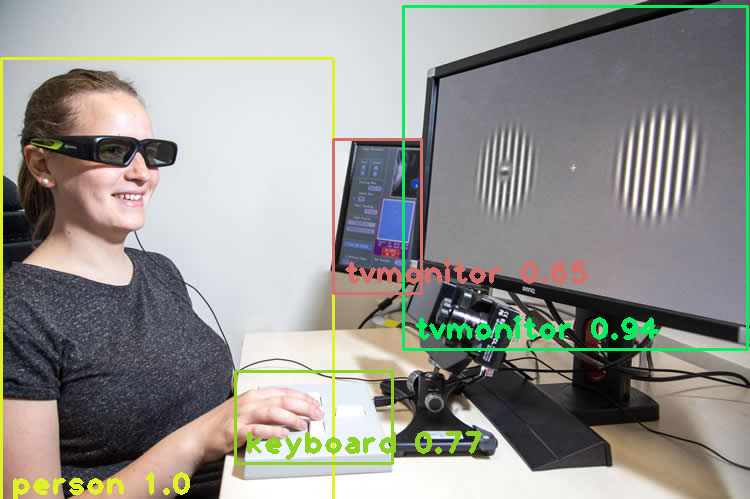

In [ ]:
colors=np.random.uniform(0,255,size=(len(classes),3))#badha object mate alg alag color
boxes=[]
confidences=[]
class_ids=[]
for out in outs:
  for detection in out:
    scores=detection[5:]
    class_id=np.argmax(scores)
    confidence=scores[class_id]

    if confidence>0.5:
      #object detected
      center_x=int(detection[0]*width)
      center_y=int(detection[1]*height)
      w=int(detection[2]*width)
      h=int(detection[3]*height)

      #rectange cordinates
      x=int(center_x-w/2)
      y=int(center_y-h/2)
      
      #rectangle,confidence,class id ni value store karisu
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

number_objects_detcted=(len(boxes)) 
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)#non max function for remove boxes from same object
font=cv2.FONT_HERSHEY_PLAIN

objects=[]

for i in range(number_objects_detcted):
  if i in indexes:
    x,y,w,h=boxes[i]
    objects.append(boxes[i])
    label=str(classes[class_ids[i]])
    confidence=str(round(confidences[i],2))
    color=colors[i]
    print(x,y,w,h)
    
    cv2.rectangle(img,
                  (x,y),
                  (x+w,y+h),
                  color,
                  2)
    
    cv2.putText(img,
                label+" "+confidence,
                (x+10,y+h-10),
                font,
                2,
                color,
                3)
  
  
  

cv2_imshow(img)


In [ ]:
print(boxes)
print(indexes)

[[403, 6, 344, 343], [1, 58, 332, 446], [333, 139, 88, 154], [235, 371, 157, 92], [234, 352, 159, 120]]
[[1]
 [0]
 [3]
 [2]]


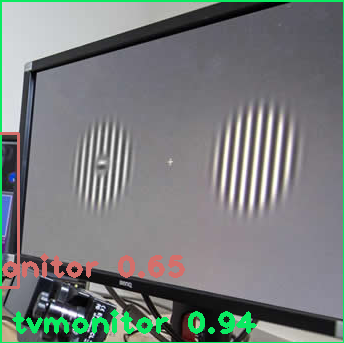

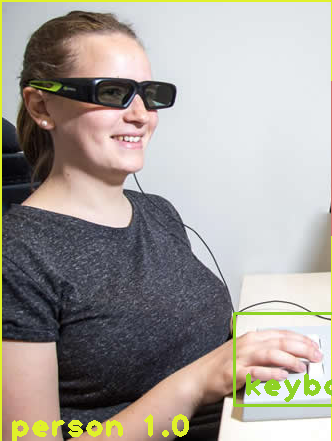

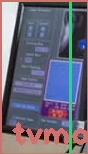

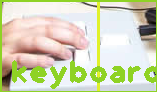

In [ ]:
for i in objects:
  x,y,w,h=i
  cv2_imshow(img[y:y+h,x:x+w])